In [1]:
from preprocess.preprocess import *
import PARAMETERS
import sys
sys.path.append('./preprocess/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix
from pathlib import Path

%matplotlib inline


PARAMETERS.PREPROCESS_OPTIMIZATION = True


PARAMETERS.LBP_METHOD = 'riu'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False
PARAMETERS.DATASET = 'DRIVE'

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu,get_pyramid_dataset,lanczos,False,5,True,True


### Resultado CV

F1-score 0.685426

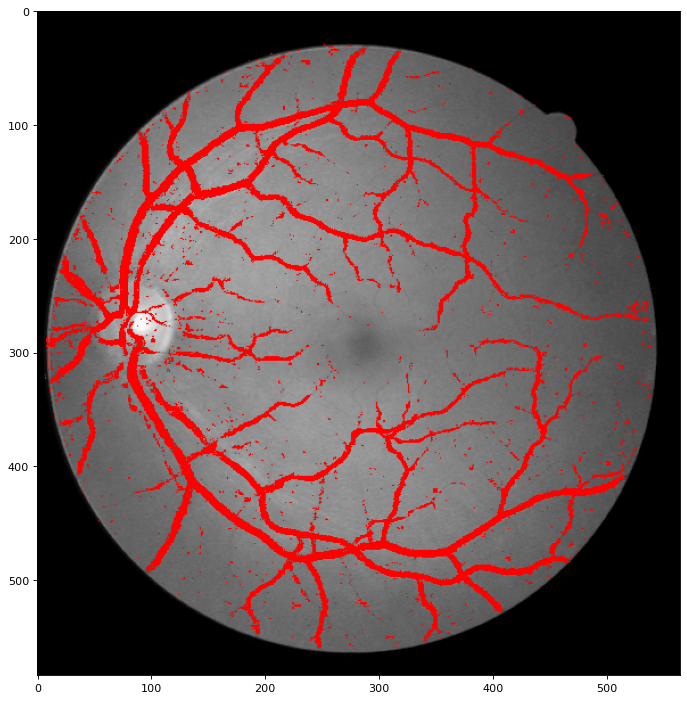

Accuracy score: 0.9292555186111174

F1 score: 0.7211952246541113

Confusion matrix:

     t/p      0     1 
        0 1141617 45928 
        1 50476 124686 
Sensivity: 0.7118324750802114
Specificity: 0.9613252550429668


(0.929, 0.721, 1141617, 45928, 50476, 124686)

In [2]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=['riu', 'var'], plot_once=True, channels=(1, 2), recurrence=False)

In [3]:
import pandas as pd

df_train_riu = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization/train_train_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
df_test_riu = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization/train_test_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

df_train_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_train_riu.columns]
df_test_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_test_riu.columns]

y_train = df_train_riu['label']
y_test = df_test_riu['label']
df_train_riu = df_train_riu.drop(['label'], axis=1)
df_test_riu = df_test_riu.drop(['label'], axis=1)


df_train_var = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization/train_train_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
df_test_var = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization/train_test_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

df_train_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_train_var.columns]
df_test_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_test_var.columns]

df_train_var = df_train_var.drop(['Original', 'label'], axis=1)
df_test_var = df_test_var.drop(['Original', 'label'], axis=1)

df_train = pd.concat([df_train_riu, df_train_var], axis=1)
df_test = pd.concat([df_test_riu, df_test_var], axis=1)
display(df_train)
display(df_test)

,Original,1:1_riu,1:2_riu,1:4_riu,1:8_riu,2:1_1_riu,2:1_2_riu,2:1_3_riu,2:1_4_riu,1:1_var,1:2_var,1:4_var,1:8_var,2:1_1_var,2:1_2_var,2:1_3_var,2:1_4_var
0,6.0,16.0,16.0,8.0,2.0,16.0,16.0,16.0,8.0,34.207819,986.405188,1078.950377,610.775370,6.0,8.0,8.0,10.0
1,6.0,8.0,16.0,8.0,2.0,8.0,4.0,8.0,8.0,41.378788,986.405188,1078.950377,610.775370,10.0,9.0,10.0,11.0
2,6.0,8.0,8.0,8.0,2.0,16.0,16.0,16.0,16.0,49.614268,946.751300,1080.569339,610.775370,6.0,4.0,9.0,8.0
3,6.0,8.0,8.0,8.0,2.0,8.0,16.0,16.0,8.0,55.235087,946.751300,1080.569339,610.775370,5.0,8.0,7.0,8.0
4,6.0,8.0,4.0,8.0,2.0,8.0,16.0,16.0,8.0,58.084878,939.564980,1080.569339,610.775370,9.0,11.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,6.0,8.0,8.0,16.0,8.0,8.0,8.0,8.0,16.0,19.468838,25.745223,40.720858,80.712379,6.0,5.0,3.0,2.0
226538,5.0,8.0,8.0,16.0,8.0,16.0,8.0,8.0,16.0,16.413066,25.745223,40.720858,80.712379,3.0,4.0,2.0,1.0
226539,5.0,8.0,8.0,4.0,8.0,8.0,16.0,8.0,16.0,13.209920,22.277346,46.454712,80.712379,4.0,3.0,1.0,0.0
226540,5.0,8.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.339891,22.277346,46.454712,80.712379,2.0,1.0,1.0,1.0


,Original,1:1_riu,1:2_riu,1:4_riu,1:8_riu,2:1_1_riu,2:1_2_riu,2:1_3_riu,2:1_4_riu,1:1_var,1:2_var,1:4_var,1:8_var,2:1_1_var,2:1_2_var,2:1_3_var,2:1_4_var
0,4.0,35.0,34.0,27.0,34.0,35.0,35.0,16.0,16.0,18.121802,118.133999,770.156290,213.297306,0.0,0.0,12.0,14.0
1,4.0,35.0,34.0,27.0,34.0,34.0,35.0,8.0,16.0,21.278972,118.133999,770.156290,213.297306,1.0,1.0,14.0,15.0
2,4.0,34.0,34.0,27.0,34.0,35.0,34.0,16.0,8.0,21.874941,95.938886,770.156290,213.297306,1.0,1.0,15.0,14.0
3,4.0,35.0,34.0,27.0,34.0,35.0,35.0,16.0,16.0,21.457019,95.938886,770.156290,213.297306,0.0,0.0,14.0,12.0
4,4.0,27.0,27.0,4.0,34.0,35.0,35.0,16.0,8.0,27.247432,152.976696,655.088358,213.297306,0.0,0.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226969,4.0,16.0,16.0,16.0,1.0,8.0,4.0,16.0,8.0,25.990788,402.264929,390.134927,105.111592,15.0,14.0,7.0,9.0
226970,4.0,4.0,16.0,16.0,1.0,8.0,16.0,16.0,8.0,36.574952,402.264929,390.134927,105.111592,10.0,5.0,8.0,6.0
226971,4.0,8.0,4.0,4.0,1.0,8.0,16.0,8.0,8.0,79.758135,402.936044,341.287790,108.259851,2.0,7.0,6.0,6.0
226972,4.0,16.0,4.0,4.0,1.0,16.0,16.0,35.0,35.0,85.829891,402.936044,341.287790,108.259851,15.0,17.0,5.0,5.0


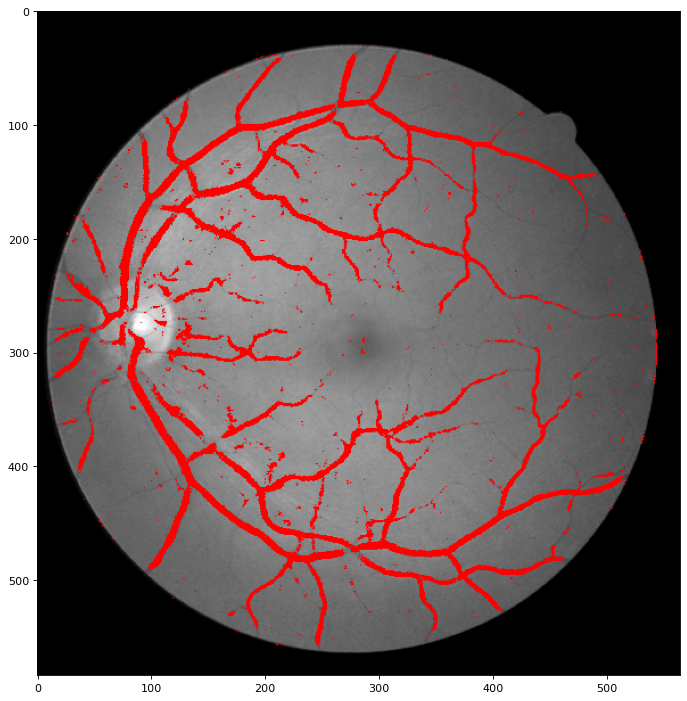

Accuracy score: 0.9334405708637293

F1 score: 0.7151753049977232

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1158134 29411 
      1.0 61290 113872 
Sensivity: 0.6500953403135383
Specificity: 0.9752337806146293


(0.933, 0.715, 1158134, 29411, 61290, 113872)

In [4]:
features = {
    'x_train': df_train,
    'x_test': df_test,
    'y_train': y_train,
    'y_test': y_test
}

main(lgb='Num', features=features, plot_once=True, recurrence=False)

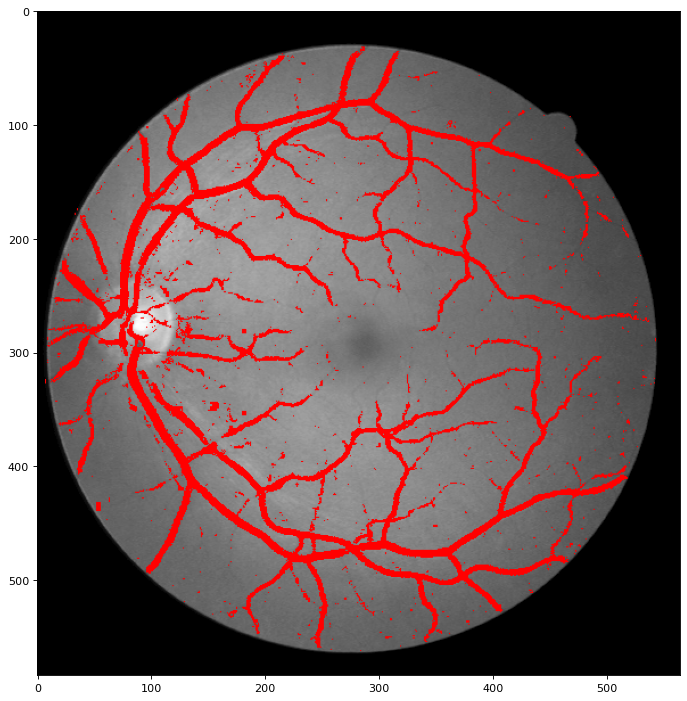

Accuracy score: 0.9362643620382077

F1 score: 0.7485590048086249

Confusion matrix:

     t/p      0     1 
        0 1146570 40975 
        1 45878 129284 
Sensivity: 0.7380824608077095
Specificity: 0.9654960443604242


(0.936, 0.749, 1146570, 40975, 45878, 129284)

In [5]:
extra_features = {
    'train': df_train,
    'test': df_test
}


main(lgb='Num', all_lbp=['riu', 'var'], extra_features=extra_features, plot_once=True, channels=(1, 2), recurrence=False)

## Combinación con convolución

,Original,1:1_riu,1:2_riu,1:4_riu,1:8_riu,2:1_1_riu,2:1_2_riu,2:1_3_riu,2:1_4_riu,1:1_var,...,2:1_1_var,2:1_2_var,2:1_3_var,2:1_4_var,0,1,2,3,4,5
0,6.0,16.0,16.0,8.0,2.0,16.0,16.0,16.0,8.0,34.207819,...,6.0,8.0,8.0,10.0,40,0,0,30,106,33
1,6.0,8.0,16.0,8.0,2.0,8.0,4.0,8.0,8.0,41.378788,...,10.0,9.0,10.0,11.0,46,0,0,22,95,26
2,6.0,8.0,8.0,8.0,2.0,16.0,16.0,16.0,16.0,49.614268,...,6.0,4.0,9.0,8.0,55,0,0,9,81,18
3,6.0,8.0,8.0,8.0,2.0,8.0,16.0,16.0,8.0,55.235087,...,5.0,8.0,7.0,8.0,60,0,0,1,79,15
4,6.0,8.0,4.0,8.0,2.0,8.0,16.0,16.0,8.0,58.084878,...,9.0,11.0,7.0,6.0,67,0,0,9,85,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,6.0,8.0,8.0,16.0,8.0,8.0,8.0,8.0,16.0,19.468838,...,6.0,5.0,3.0,2.0,15,48,26,124,100,38
226538,5.0,8.0,8.0,16.0,8.0,16.0,8.0,8.0,16.0,16.413066,...,3.0,4.0,2.0,1.0,19,52,19,123,95,43
226539,5.0,8.0,8.0,4.0,8.0,8.0,16.0,8.0,16.0,13.209920,...,4.0,3.0,1.0,0.0,16,50,24,129,97,42
226540,5.0,8.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.339891,...,2.0,1.0,1.0,1.0,13,38,11,129,97,41


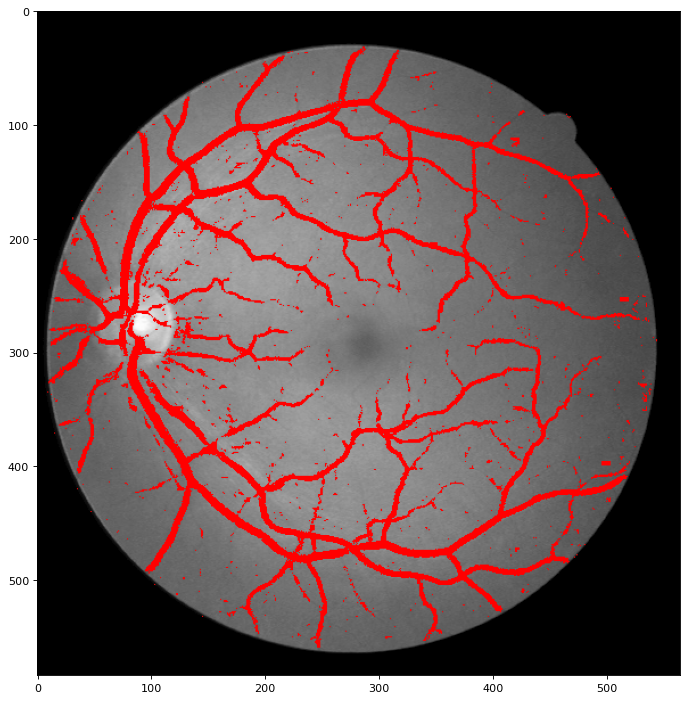

Accuracy score: 0.9366481569405603

F1 score: 0.7528584597239161

Confusion matrix:

     t/p      0     1 
        0 1144885 42660 
        1 43670 131492 
Sensivity: 0.7506879345976867
Specificity: 0.9640771507606027


(0.937, 0.753, 1144885, 42660, 43670, 131492)

In [6]:
import pickle
from os import listdir

PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/images'
MASK_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/mask'
LABELS_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/1st_manual'

def load_images():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][:14]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][:14]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES = load_images()
MASKS = load_masks()

with open(r'/home/fer/Drive/Estudios/Master-IA/TFM/lbp-pyramid/convolution/outputs/16506693338675942_200_iterations/population.pkl', 'rb') as f:
    kernels = pickle.load(f)
    
population, fitness = kernels['population'], kernels['fitness']
individual = population[np.argmax(fitness), :]
n_kernels = 6
k_size = (3, 5, 7)

features = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES, MASKS, features)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features = pd.concat(features, ignore_index=True)

def load_images_test():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][14:]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks_test():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][14:]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES_test = load_images_test()
MASKS_test = load_masks_test()

features_test = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features_test = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES_test, MASKS_test, features_test)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features_test = pd.concat(features_test, ignore_index=True)

extra_features = {'train': conv_features, 'test': conv_features_test}


from main import get_channel_features, get_labels
import pandas as pd

temp_train, temp_test = get_channel_features('../', lbp_version=['riu', 'var'], channels=(1, 2))
conv_features.index = temp_train.index
conv_features_test.index = temp_test.index
df_train.index = temp_train.index
df_test.index = temp_test.index
y_train, y_test = get_labels('../')


extra_features = {
    'train': pd.concat([df_train, conv_features], axis=1),
    'test': pd.concat([df_test, conv_features_test], axis=1)
}
display(extra_features['train'])


main(lgb='Num', all_lbp=['riu', 'var'], extra_features=extra_features, plot_once=True, channels=(1, 2), recurrence=False)

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


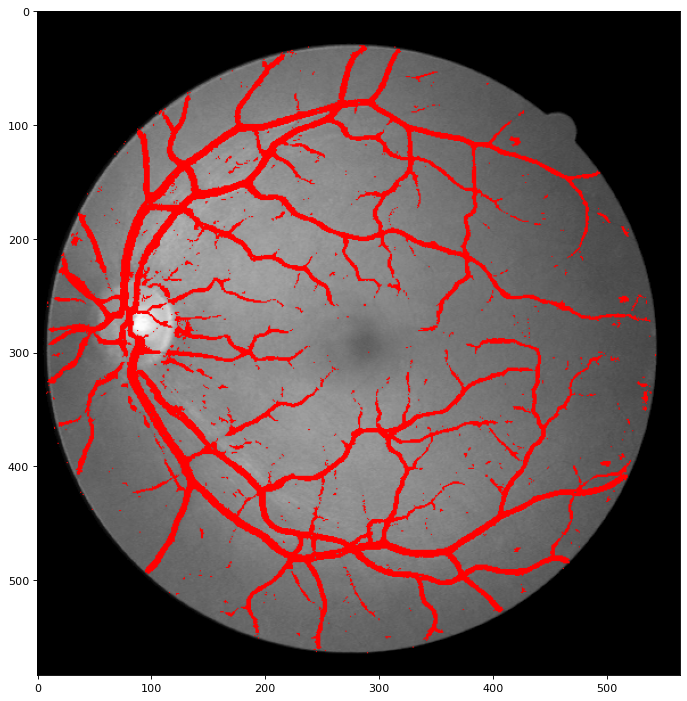

Accuracy score: 0.9399636165367904

F1 score: 0.7708886424482754

Confusion matrix:

     t/p      0     1 
        0 1143259 44286 
        1 37526 137636 
Sensivity: 0.7857640355784931
Specificity: 0.9627079394886089


(0.94, 0.771, 1143259, 44286, 37526, 137636)

In [8]:
main(lgb='Num', all_lbp=['riu', 'var'], extra_features=extra_features, plot_once=True, channels=(1, 2), recurrence=True)